<a class="anchor" id="section-0"></a>
<img src="https://i.imgur.com/lTCPbz0.jpeg" alt='logo puc-sp' width='30%' align='left'>

### Pontifícia Universidade Católica de São Paulo (PUC-SP)

<h1 style=font-size:30px>StellarClassification</h1>


### Bacharelado em Ciência de Dados e Inteligência Artificial

#### Turma: CDIA21-MA

**Professor:** Jefferson de Oliveira Silva

**Alunos:**

<table align="left" style=font-size:15px>
<thead>
  <tr>
    <th style="text-align:left;">Nome</th>
    <th style="text-align:left;">RA</th>
    <th></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align:left;">Carlos Eduardo de Oliveira</td>
    <td>RA00297792</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Gustavo Schlieper Tessitore</td>
    <td>RA00297844</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Isaac Higuchi</td>
    <td>RA00306191</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">João Pedro Taves Araujo</td>
    <td>RA00297753</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Lucas Lopes Amorim</td>
    <td>RA00303799</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Thiago de Jesus Carvalho</td>
    <td>RA00297792</td>
    <td></td>
  </tr>
</tbody>
</table>

<h3><b>Estrutura:</b></h3>
<ol>
   <li><a href="#section-1">Contextualização</a></li>
   <li><a href="#section-2">Objetivo do Trabalho</a></li>
   <li>
      <a href="#section-3">Método</a>
      <ol style="list-style: none; padding-left: 10px">
         <li>3.1. <a href="#section-3-1">Entendimento dos Dados</a></li>
         <li>3.2. <a href="#section-3-2">Preparação dos Dados</a></li>
         <ol style="list-style: none; padding-left: 20px">
            <li>3.2.1 <a href="#section-3-2-1">Gerando novos atributos</a></li>
            <li>3.2.2 <a href="#section-3-2-2">Tratando variáveis categórias</a></li>
         </ol>
         <li>3.3. <a href="#section-3-3">Modelagem</a></li>
         <ol style="list-style: none; padding-left: 20px">
            <li>3.3.1 <a href="#section-3-3-1">Modelo #1: Árvore de Decisão</a></li>
            <li>3.3.2 <a href="#section-3-3-2">Modelo #2: Floresta Aleatória de Classificação</a></li>
            <li>3.3.3 <a href="#section-3-3-3">Modelo #3: Naive Bayes</a></li>
            <li>3.3.4 <a href="#section-3-3-4">Modelo #4: SVC</a></li>
            <li>3.3.5 <a href="#section-3-3-5">Modelo #5: KNN</a></li>
         </ol>
      </ol>
   </li>
   <li><a href="#section-4">Limitações</a></li>
   <li><a href="#section-5">Conclusões</a></li>
</ol>
<p><a href="#section-n">Referências</a></p>

# 1. Contextualização <a class="anchor" id="section-1"></a>
[Voltar ao topo](#section-0)

# 2. Objetivo do Trabalho <a class="anchor" id="section-2"></a>
[Voltar ao topo](#section-0)

# 3. Método <a class="anchor" id="section-3"></a>
[Voltar ao topo](#section-0)

## 3.1 Entendimento dos Dados <a class="anchor" id="section-3-1"></a>
[Voltar ao topo](#section-0)

## 3.2 Preparação dos Dados <a class="anchor" id="section-3-2"></a>
[Voltar ao topo](#section-0)

In [1]:
# Para manipulação dos dados
import pandas as pd
import numpy as np

# Para Dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# Para criação do nosso pipeline
from sklearn.compose import ColumnTransformer

# Para tratamentos de dados
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Para separação em treino e teste
from sklearn.model_selection import train_test_split

# Para aplicar resamplings
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Para ignorar mensagens de warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\lucas\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('data/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
cols = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'redshift', 'MJD']

In [4]:
preprocessing = ColumnTransformer(transformers=[
    ('scaling', StandardScaler(), cols),
], remainder='drop')

In [5]:
target_encoder = OrdinalEncoder()

In [6]:
X, y = df.drop('class', axis=1), df['class']

In [7]:
X_train_full, X_test_full, y_train, y_test = train_test_split(X , y, test_size=0.2, stratify=y)

In [8]:
X_train = preprocessing.fit_transform(X_train_full)
y_train_encoded = target_encoder.fit_transform(y_train.values.reshape(-1, 1))

In [9]:
X_test = preprocessing.transform(X_test_full)
y_test_encoded = target_encoder.fit_transform(y_test.values.reshape(-1, 1))

**Aplicando Oversampling:**

In [10]:
def apply_oversampling(X_train_, y_train_, **kwargs):
    ros = RandomOverSampler(**kwargs)
    X_train_oversam_, y_train_oversam_ = ros.fit_resample(X_train_, y_train_)
    return X_train_oversam_, y_train_oversam_

In [11]:
X_train_oversam, y_train_oversam = apply_oversampling(X_train, y_train, random_state=42)

**Aplicando Undersampling:**

In [12]:
def apply_undersampling(X_train_, y_train_, **kwargs):
    rus = RandomUnderSampler(**kwargs)
    X_train_undersam_, y_train_undersam_ = rus.fit_resample(X_train, y_train)
    return X_train_undersam_, y_train_undersam_

In [13]:
X_train_undersam, y_train_undersam = apply_undersampling(X_train, y_train, random_state=42)

## 3.3 Escolhendo melhores técnicas de resample <a class="anchor" id="section-3-3"></a>
[Voltar ao topo](#section-0)

In [14]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [15]:
def calcululate_metrics(y_test_, y_pred_, pos_label=1, average='binary', round_=3):
    return (
    round(metrics.accuracy_score(y_test_, y_pred_), 3),
    round(metrics.precision_score(y_test_, y_pred_, pos_label=pos_label, average=average), round_),
    round(metrics.recall_score(y_test_, y_pred_, pos_label=pos_label, average=average), round_),
    round(metrics.f1_score(y_test_, y_pred_, pos_label=pos_label, average=average),round_)
    )

In [16]:
def evaluate_resample(model, X_train_resample, X_test_resample, y_train_resample, y_test_resample):
    model.fit(X_train_resample, y_train_resample)

    y_pred = model.predict(X_test_resample)
    
    return calcululate_metrics(y_test_resample, y_pred, average='weighted')

In [17]:
%%time
undersam_perf = evaluate_resample(
    RandomForestClassifier(random_state=42), X_train_undersam, X_test, y_train_undersam, y_test
)
undersam_perf

Wall time: 17.5 s


(0.97, 0.971, 0.97, 0.97)

In [18]:
%%time
oversam_perf = evaluate_resample(
    RandomForestClassifier(random_state=42), X_train_oversam, X_test, y_train_oversam, y_test
)
oversam_perf

Wall time: 41.1 s


(0.977, 0.977, 0.977, 0.977)

In [19]:
%%time
default_perf = evaluate_resample(
    RandomForestClassifier(random_state=42), X_train, X_test, y_train, y_test
)
default_perf

Wall time: 25.1 s


(0.977, 0.977, 0.977, 0.977)

In [20]:
def plot_resample_comparison(over_result, under_result, default_result, suptitle, title):
    metrics_list = ['accuracy', 'precision', 'recall', 'f1']
    
    resampling_results = pd.DataFrame(
        {
            'Resample': ['oversample']*len(over_result) + ['undersample']*4 + ['default']*4,
            'Metric': metrics_list*3,
            'Score': over_result + under_result + default_result
        }
    )
    
    plt.figure(figsize=(15,6))
    plt.suptitle(suptitle, weight='bold', fontsize=24)
    plt.title(title, pad=30, loc='left', fontsize=20)
    plt.subplots_adjust(top=0.8)
    ax = sns.barplot(data=resampling_results, x='Metric', y='Score', hue='Resample')
    plt.ylim((0, 1))
    plt.legend(title='', fontsize=16, bbox_to_anchor=(1.05, 1))
    for i in ax.containers:
        ax.bar_label(i, fontsize=10)
    plt.ylim(0.9, 1)
    plt.show()

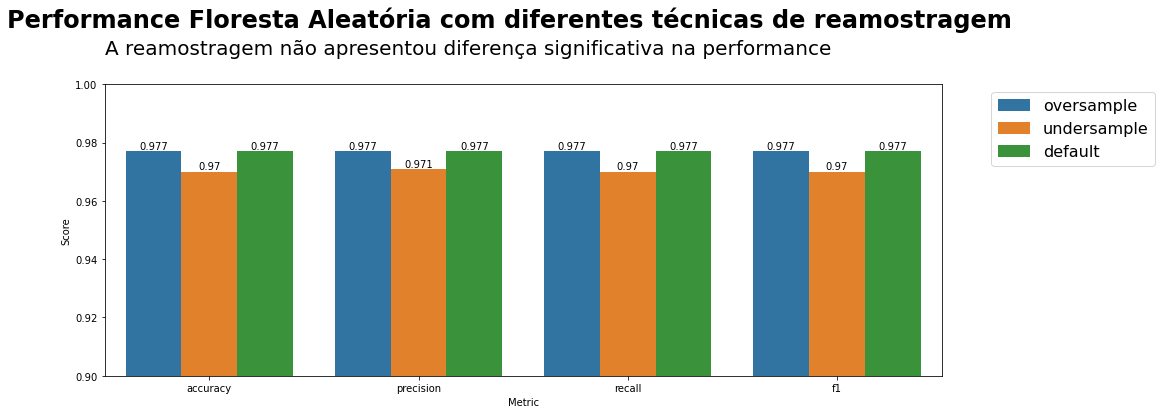

In [21]:
plot_resample_comparison(oversam_perf, undersam_perf, default_perf,
                         suptitle='Performance Floresta Aleatória com diferentes técnicas de reamostragem',
                         title='A reamostragem não apresentou diferença significativa na performance'
                        )

## 3.4 Aplicando PCA <a class="anchor" id="section-3-4"></a>
[Voltar ao topo](#section-0)

Já que não houve diferença significativa entre as ténicas de reamostragem, vamos aplicar o PCA na amostragem padrão dos dados

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA()

In [24]:
%%time
pca_data = pca.fit_transform(X_train)

Wall time: 46.9 ms


In [25]:
# FICOU ULTRAPASSADA
def plot_pca_explicability(pca_):
    """
    Plot explicability chart of the first 10 PCs
    """
    per_var = np.round(pca_.explained_variance_ratio_* 100, decimals=1)[:10]
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

    plt.figure(figsize=(15, 6)) 
    plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
    plt.ylabel('Porcentagem de variância explicada')
    plt.xlabel('Principal Component')
    plt.suptitle('Explicabilidade dos Componentes Principais', size=18, weight='bold')
    plt.annotate(
        text=f'Os dois primeiros componentes principais explicam {per_var[:2].sum():.1f}% da variância do dataset',
        xy=(0.3,0.7), xycoords='figure fraction', size=12
    )
    plt.show()

In [26]:
# SEM USO
def most_important_feat_per_pc(pca_, feat_labels):
    pca_labels = ['PC' + str(x) for x in range(1, len(pca.components_)+1)]
    most_influent_feature = [
        pd.Series(pca.components_[i], index=preprocessing.get_feature_names_out()).abs().idxmax()
        for i in range(len(labels))
    ]
    return most_influent_feature

In [27]:
def n_most_important_feat_per_pca(pca_, feat_labels):
    pca_labels = ['PC' + str(x) for x in range(1, len(pca.components_)+1)]
    pca_labels_dict = {'PC': pca_labels}
    feat_influences_dict = {feat: np.abs(pca_.components_[i]) for i, feat in enumerate(feat_labels)}
    most_influent_features = pd.DataFrame(dict(**pca_labels_dict, **feat_influences_dict))

    # scale feature importances based on explanied variance ration of each PC
    n_data = most_influent_features[feat_labels].values
    n_data_scaled = (n_data/(n_data.sum(axis=1)[:,None]) * pca_.explained_variance_ratio_.reshape(-1, 1))
    most_influent_features[feat_labels] = n_data_scaled
    
    # sort based on the most important features
    pc1_most_important_features = most_influent_features.iloc[:, 1:].sum(axis=0).sort_values(ascending=False).index.to_list()
    most_influent_features = most_influent_features[['PC'] + pc1_most_important_features]
    
    # rename columns to add the explanability ratio of the features
    num_data = most_influent_features.iloc[:, 1:]
    num_cols_names = [
        col.split('__')[-1] + f' ({(ratio*100):.1f}%)'
        for col, ratio in zip(
            num_data.columns,  # Column names
            num_data.sum(axis=0)  # Explanability ratio per feature
        )
    ]

    new_column_names = ['PC'] + num_cols_names
    most_influent_features.columns = new_column_names
    
    return most_influent_features

In [28]:
def plot_pca_explicability(pca_, feat_labels, limit_pc=10, limit_feat=None):
    """
    Plot explicability chart of the first limit_pc PCs
    """
    # To format y axis as percentage
    import matplotlib.ticker as mtick

    
    pc_feat = n_most_important_feat_per_pca(pca_, feat_labels)
    
    if isinstance(limit_pc, int):
        pc_feat = pc_feat.iloc[:limit_pc, :]
    
    if limit_feat:
        if limit_feat > len(pca_.components_):
            raise ValueError('You cant have more features than components')
        if limit_feat <=2:
            raise ValueError('You need at least 2 components')
        remain = pc_feat.iloc[:, limit_feat+1:].sum(axis=1)
        remain.rename(f'Demais features ({remain.sum()*100:.1f}%)', inplace=True)
        pc_feat = pd.concat([pc_feat.iloc[:, :limit_feat+1], remain], axis=1)
    
    expl_2_first = pc_feat.iloc[:2, 1:].sum().sum()
    pc_feat.plot(x='PC', kind='bar', stacked=True, figsize=(12, 6))
    plt.legend(title='Features por explicabilidade\nda variância', loc='upper right', bbox_to_anchor=(1.3, 1), prop={'size':14})
    plt.ylabel('Porcentagem de variância explicada')
    plt.xlabel('Principal Component')
    plt.suptitle('Explicabilidade dos Componentes Principais', size=18, weight='bold')
    plt.annotate(
        text=f'Os dois primeiros componentes principais explicam {expl_2_first*100:.1f}%\n da variância do dataset.',
        xy=(0.3,0.7), xycoords='figure fraction', size=12
    )
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.xticks(rotation=0)
    plt.show()

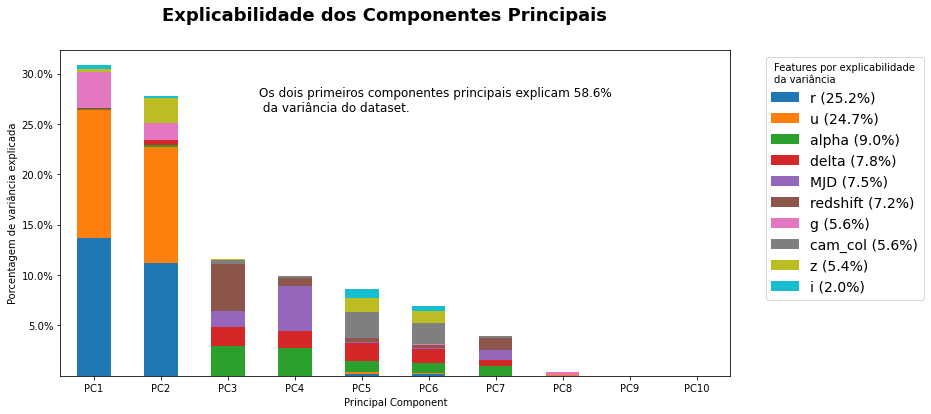

In [29]:
plot_pca_explicability(pca, preprocessing.get_feature_names_out())

In [56]:
labels = ['PC' + str(x) for x in range(1, pca.n_components_+1)]
pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df['class'] = y_train
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,class
0,-0.819975,1.124246,-0.729830,0.815632,-0.381610,-1.366730,0.857828,0.353953,0.004013,-0.007906,GALAXY
1,-1.123593,1.624025,0.433281,1.610903,1.450601,-0.515746,0.538956,-0.448114,-0.043053,-0.009547,GALAXY
2,-0.593128,0.715826,0.898875,-0.805277,0.185484,-1.182870,0.644295,0.281010,0.058584,-0.020880,GALAXY
3,0.145293,-0.357294,-0.812389,-1.207566,1.447058,-0.201310,-0.626542,-0.035317,0.101857,-0.019628,GALAXY
4,-0.503841,0.878893,0.054023,0.960688,0.992898,0.882855,-0.770594,0.003484,-0.024682,0.000290,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...
79995,-1.113532,1.796182,-0.162646,1.594988,0.510566,0.844571,-0.845703,0.017210,-0.021851,-0.005654,GALAXY
79996,-0.190572,0.159850,-0.933296,-0.490693,-0.522592,-0.929579,0.184727,-0.073048,-0.002809,0.009249,GALAXY
79997,1.684315,-2.458133,-2.254027,1.117878,0.344974,0.485437,0.240935,-0.007950,-0.005133,0.000758,NaN
79998,-0.307847,0.282449,-1.956858,-1.361438,0.051012,-0.243248,-0.623233,-0.145431,0.093833,-0.025189,GALAXY


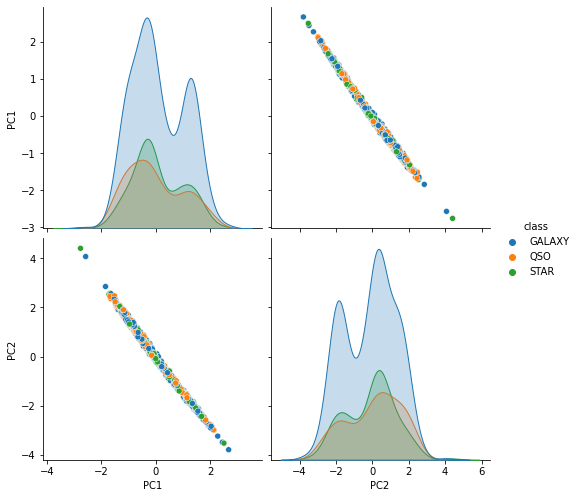

In [102]:
sns.pairplot(data=pca_df[['PC1', 'PC2', 'class']].sample(1000, random_state=42), hue='class', height=3.5)
plt.show()

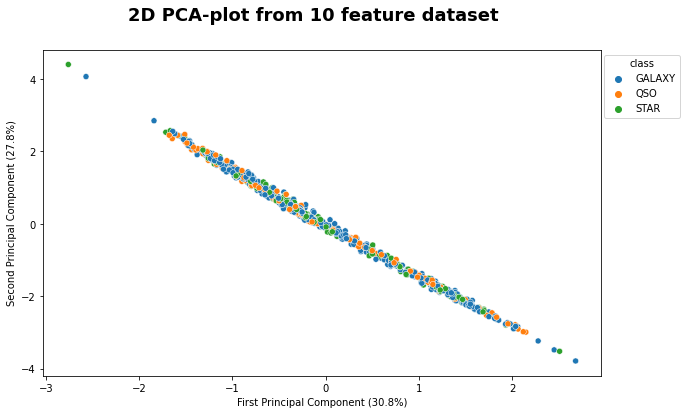

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df.sample(1000, random_state=42), x='PC1', y='PC2', hue='class')
plt.suptitle(f'2D PCA-plot from {pca.n_features_in_} feature dataset', size=18, weight='bold')
plt.legend(title='class', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xlabel(f'First Principal Component ({(pca.explained_variance_ratio_[0]*100):.1f}%)')
plt.ylabel(f'Second Principal Component ({(pca.explained_variance_ratio_[1]*100):.1f}%)')
# plt.yscale('log')
# plt.xscale('log')
plt.show()

## 3.5 Modelagem <a class="anchor" id="section-3-5"></a>
[Voltar ao topo](#section-0)

### 3.3.1 Modelo #1: Árvore de Decisão <a class="anchor" id="section-3-3-1"></a>
[Voltar ao topo](#section-0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix


In [ ]:
cl_tree = DecisionTreeClassifier()

In [ ]:
cl_tree = cl_tree.fit(X_train, y_train)
previsao = cl_tree.predict(X_test)

In [ ]:
print(classification_report(y_test, previsao))

In [ ]:
plot_confusion_matrix(cl_tree, X_test, y_test)

### 3.3.2 Modelo #2: Floresta Aleatória de Classificação <a class="anchor" id="section-3-3-2"></a>
[Voltar ao topo](#section-0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf = rf_clf.fit(X_train, y_train)

previsao_rf = rf_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, previsao_rf))

In [ ]:
plot_confusion_matrix(rf_clf, X_test, y_test)

### 3.3.3 Modelo #3: Naive Bayes <a class="anchor" id="section-3-3-3"></a>
[Voltar ao topo](#section-0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
predict = gnb.predict(X_test)
predict

In [ ]:
accuracy_score(y_test, predict)

print(classification_report(y_test, predict))

### 3.3.4 Modelo #4: SVC <a class="anchor" id="section-3-3-4"></a>
[Voltar ao topo](#section-0)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
model = SVC(class_weight='balanced', kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

### 3.3.5 Modelo #5: KNN <a class="anchor" id="section-3-3-5"></a>
[Voltar ao topo](#section-0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
plot_confusion_matrix(knn_model, X_test, y_test)

## Rascunho

In [ ]:
# def evaluate_resample(models, models_labels, X_train_resample, X_test_resample, y_train_resample, y_test_resample):
#     results = dict()
#     for m, label in zip(models, models_labels):
#         m.fit(X_train_resample, y_train_resample)
        
#         y_pred = m.predict(X_test_resample)
        
#         results[label] = calcululate_metrics(y_test_resample, y_pred, average='weighted')
        
#     return results

In [ ]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    SVC(random_state=42)
]

models_labels = [
    'Árvore de Decisão',
    'Floresta Aleatória',
    'Naive Bayes',
    'SVC'
]

In [ ]:
%time
undersam_performance = evaluate_resample(models, models_labels, X_train_undersam, X_test, y_train_undersam, y_test)
undersam_performance

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
model = RandomForestClassifier(random_state=42)
model.fit(X_train_undersam, y_train_undersam)

y_pred = model.predict(X_test)

In [125]:
calcululate_metrics(y_test, y_pred, average='weighted')

(0.972, 0.972, 0.972, 0.972)

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.97      0.98     11889
         QSO       0.92      0.95      0.94      3792
        STAR       0.98      1.00      0.99      4319

    accuracy                           0.97     20000
   macro avg       0.96      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



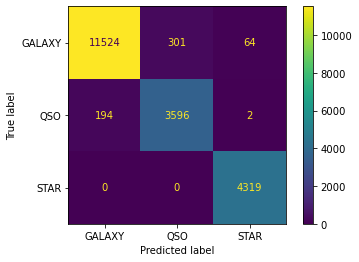

In [127]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [134]:
(pd.DataFrame(
    {'feature': preprocessing.get_feature_names_out(),
     'importance': model.feature_importances_}
).sort_values(by='importance', ascending=False))

,feature,importance
8,scaling__redshift,0.609879
6,scaling__z,0.097255
3,scaling__g,0.070370
2,scaling__u,0.061933
5,scaling__i,0.055679
9,scaling__MJD,0.044023
4,scaling__r,0.038343
0,scaling__alpha,0.010000
1,scaling__delta,0.009588
7,scaling__cam_col,0.002930


In [71]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_oversam, y_train_oversam)

y_pred = model.predict(X_test)

In [72]:
calcululate_metrics(y_test, y_pred, average='weighted')

(0.964, 0.964, 0.964, 0.964)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11889
         QSO       0.91      0.91      0.91      3792
        STAR       1.00      1.00      1.00      4319

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



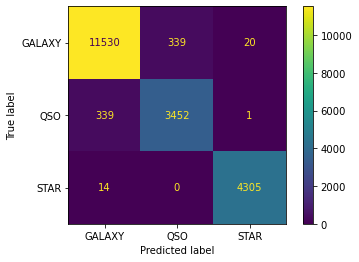

In [74]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)